In [1]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [4]:
# Now we load the TF bhsa database
OT = use('bhsa', hoist=globals())

This is Text-Fabric 9.0.4
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

127 features found and 0 ignored


# 1 Kings 17
## v1 - the Oath langauge

1 Kings 17:1 (BHS SESB 2.0)
1 וַיֹּאמֶר֩ אֵלִיָּ֨הוּ הַתִּשְׁבִּ֜י מִתֹּשָׁבֵ֣י גִלְעָד֮ אֶל־אַחְאָב֒ חַי־יְהוָ֞ה אֱלֹהֵ֤י יִשְׂרָאֵל֙ אֲשֶׁ֣ר עָמַ֣דְתִּי לְפָנָ֔יו אִם־יִהְיֶ֛ה הַשָּׁנִ֥ים הָאֵ֖לֶּה טַ֣ל וּמָטָ֑ר כִּ֖י אִם־לְפִ֥י דְבָרִֽי׃ ס


As the query below shows, the specific oath formula in v1 (חַי + proper name + אִם condition) can mostly be found in Samuel and Kings.

In [7]:
Oath='''
c1:sentence 
    phrase
        word lex=XJ/
c2:sentence
    phrase
        word lex=>M


c1 <: c2

'''
Oath=OT.search(Oath)
OT.table(Oath, end=40, colorMap={2:'cyan', 5:'magenta'})

  1.22s 32 results


n,p,sentence,phrase,word,sentence,phrase,word
1,Genesis 42:15,חֵ֤י פַרְעֹה֙,חֵ֤י,חֵ֤י,אִם־תֵּצְא֣וּ מִזֶּ֔ה כִּ֧י אִם־בְּבֹ֛וא אֲחִיכֶ֥ם הַקָּטֹ֖ן הֵֽנָּה׃,אִם־,אִם־
2,Genesis 42:15,חֵ֤י פַרְעֹה֙,חֵ֤י,חֵ֤י,אִם־תֵּצְא֣וּ מִזֶּ֔ה כִּ֧י אִם־בְּבֹ֛וא אֲחִיכֶ֥ם הַקָּטֹ֖ן הֵֽנָּה׃,כִּ֧י אִם־,אִם־
3,Deuteronomy 32:40,חַ֥י אָנֹכִ֖י לְעֹלָֽם׃,חַ֥י,חַ֥י,אִם־שַׁנֹּותִי֙ בְּרַ֣ק חַרְבִּ֔י,אִם־,אִם־
4,1_Samuel 14:39,כִּ֣י חַי־יְהוָ֗ה הַמֹּושִׁ֨יעַ֙ אֶת־יִשְׂרָאֵ֔ל,חַי־,חַי־,כִּ֧י אִם־יֶשְׁנֹ֛ו בְּיֹונָתָ֥ן בְּנִ֖י,כִּ֧י אִם־,אִם־
5,1_Samuel 14:45,חַי־יְהוָה֙,חַי־,חַי־,אִם־יִפֹּ֞ל מִשַּׂעֲרַ֤ת רֹאשֹׁו֙ אַ֔רְצָה,אִם־,אִם־
6,1_Samuel 17:55,חֵֽי־נַפְשְׁךָ֥ הַמֶּ֖לֶךְ,חֵֽי־,חֵֽי־,אִם־יָדָֽעְתִּי׃,אִם־,אִם־
7,1_Samuel 19:6,חַי־יְהוָ֖ה,חַי־,חַי־,אִם־יוּמָֽת׃,אִם־,אִם־
8,1_Samuel 20:21,חַי־יְהוָֽה׃,חַי־,חַי־,וְאִם־כֹּ֤ה אֹמַר֙ לָעֶ֔לֶם,אִם־,אִם־
9,1_Samuel 26:10,חַי־יְהוָ֔ה,חַי־,חַי־,כִּ֥י אִם־יְהוָ֖ה יִגָּפֶ֑נּוּ,כִּ֥י אִם־,אִם־
10,1_Samuel 28:10,חַי־יְהוָ֕ה,חַי־,חַי־,אִֽם־יִקְּרֵ֥ךְ עָוֹ֖ן בַּדָּבָ֥ר הַזֶּֽה׃,אִֽם־,אִֽם־


In [9]:
OT.export(Oath, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT/BibleBook_OT_Kings/publication/', toFile='Oath.tsv')

In [10]:
Oath=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/BibleBook_OT_Kings/publication/Oath.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
Oath.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,NODE5,TYPE5,TEXT5,NODE6,TYPE6,TEXT6,lex6
0,1,Genesis,42,15,1176067,sentence,חֵ֤י פַרְעֹה֙,666229,phrase,חֵ֤י,23666,word,חֵ֤י,XJ/,1176068,sentence,אִם־תֵּצְא֣וּ מִזֶּ֔ה כִּ֧י אִם־בְּבֹ֛וא אֲחִי...,666231,phrase,אִם־,23668,word,אִם־,>M
1,2,Genesis,42,15,1176067,sentence,חֵ֤י פַרְעֹה֙,666229,phrase,חֵ֤י,23666,word,חֵ֤י,XJ/,1176068,sentence,אִם־תֵּצְא֣וּ מִזֶּ֔ה כִּ֧י אִם־בְּבֹ֛וא אֲחִי...,666234,phrase,כִּ֧י אִם־,23673,word,אִם־,>M
2,3,Deuteronomy,32,40,1187267,sentence,חַ֥י אָנֹכִ֖י לְעֹלָֽם׃,715202,phrase,חַ֥י,111967,word,חַ֥י,XJ/,1187268,sentence,אִם־שַׁנֹּותִי֙ בְּרַ֣ק חַרְבִּ֔י,715205,phrase,אִם־,111971,word,אִם־,>M
3,4,1_Samuel,14,39,1192521,sentence,כִּ֣י חַי־יְהוָ֗ה הַמֹּושִׁ֨יעַ֙ אֶת־יִשְׂרָאֵ֔ל,736555,phrase,חַי־,149234,word,חַי־,XJ/,1192522,sentence,כִּ֧י אִם־יֶשְׁנֹ֛ו בְּיֹונָתָ֥ן בְּנִ֖י,736560,phrase,כִּ֧י אִם־,149241,word,אִם־,>M
4,5,1_Samuel,14,45,1192550,sentence,חַי־יְהוָה֙,736655,phrase,חַי־,149377,word,חַי־,XJ/,1192551,sentence,אִם־יִפֹּ֞ל מִשַּׂעֲרַ֤ת רֹאשֹׁו֙ אַ֔רְצָה,736657,phrase,אִם־,149379,word,אִם־,>M


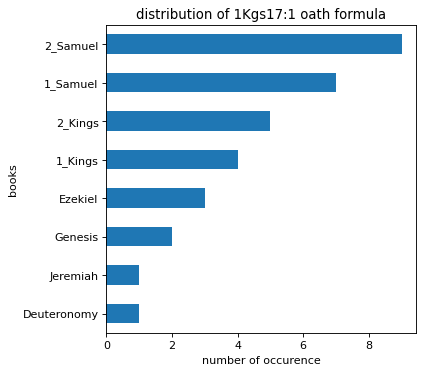

In [12]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
Oath.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('number of occurence')
plt.ylabel('books')
plt.title('distribution of 1Kgs17:1 oath formula')
plt.show()